## Loading data into Pandas

In [65]:
import pandas as pd

df = pd.read_csv('pokemon_data.csv')
df
# print(df.head(5))

# df_xlsx = pd.read_excel('pokemon_data.xlsx')
# print(df_xlsx.head(3))

# df = pd.read_csv('pokemon_data.txt', delimiter='\t')

# print(df.head(5))

#df['HP']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


## Reading Data in Pandas

In [ ]:
#### Read Headers
df.columns

## Read each Column
#print(df[['Name', 'Type 1', 'HP']])

## Read Each Row
#print(df.iloc[0:4])
# for index, row in df.iterrows():
#     print(index, row['Name'])
#df.loc[df['Type 1'] == "Grass"]

## Read a specific location (R,C)
#print(df.iloc[2,1])


## Sorting/Describing Data

In [3]:
df.sort_values(['Type 1', 'HP'], ascending=[1,0])

df

NameError: name 'df' is not defined

## Making changes to the data

In [2]:
#df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

# df = df.drop(columns=['Total'])

df['Total'] = df.iloc[:, 4:10].sum(axis=1)

cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]]

df.head(5)

NameError: name 'df' is not defined

In [ ]:
45+49+49+65+65+45

## Saving our Data (Exporting into Desired Format)

In [ ]:
df.to_csv('modified.csv')

#df.to_excel('modified.xlsx', index=False)

#df.to_csv('modified.txt', index=False, sep='\t')




## Filtering Data

In [ ]:
new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]

new_df.reset_index(drop=True, inplace=True)

new_df

new_df.to_csv('filtered.csv')

new_df.reset_index(drop=True, inplace= True)

new_df



## Conditional Changes

In [ ]:


# df.loc[df['Total'] > 500, ['Generation','Legendary']] = ['Test 1', 'Test 2']

# df

#df.loc[df['Type 1]] == 'Fire', 'Type 1' ] = 'Flamer'

df = pd.read_csv('modified.csv')
df.groupby(['Type 1']).count()

## Aggregate Statistics (Groupby)


In [ ]:
df = pd.read_csv('modified.csv')

df['count'] = 1

df.groupby(['Type 1', 'Type 2']).count()['count']






## Working with large amounts of data



In [ ]:
new_df = pd.DataFrame(columns=df.columns)

for df in pd.read_csv('modified.csv', chunksize=5):
    results = df.groupby(['Type 1']).count()
    
    new_df = pd.concat([new_df, results])
    
new_df
    





# POR YURI

# Removendo Pokemon Megas do csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('modified.csv')

pokedex_filtered = pokedex[~pokedex['Name'].str.contains('mega', case=False)]
pokedex_filtered.to_csv('filtered_pokemon_data.csv', index=False)

# Gráfico Pie, % Total de cada tipo de pokemon.

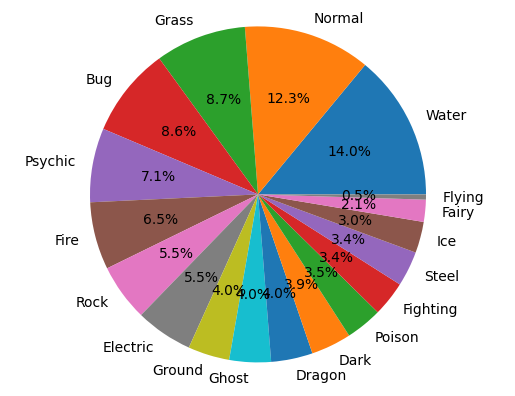

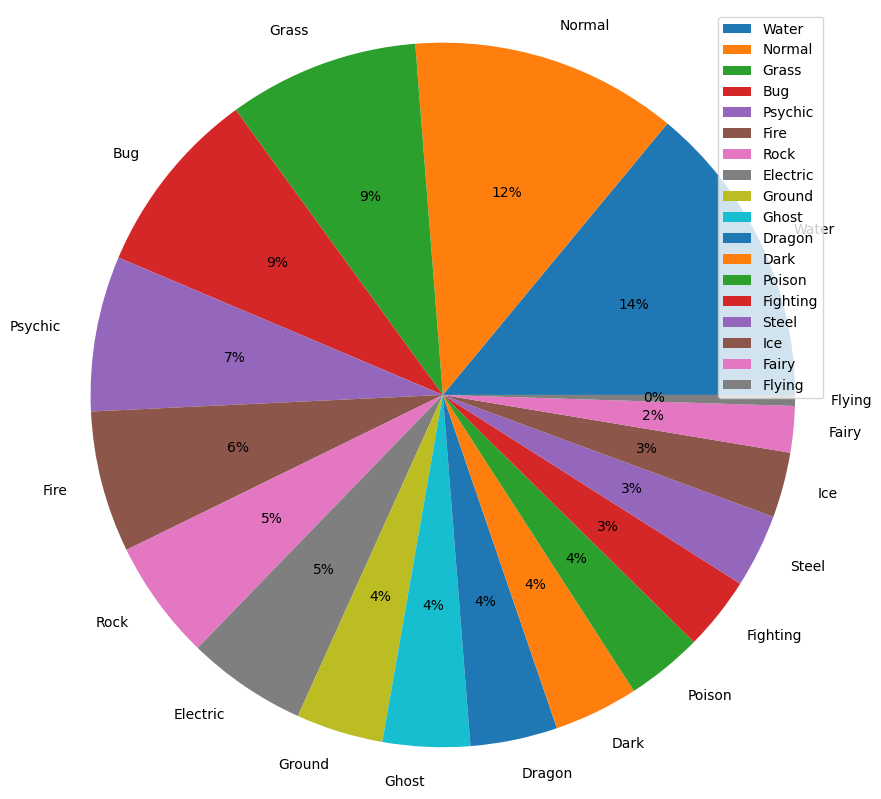

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('pokemon_data.csv')

poke_type = pokedex['Type 1'].value_counts()

poke_type.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal') 
plt.ylabel('') 
plt.show()

poke_dataframe = pd.DataFrame({'Type 1': poke_type.index, 'Count': poke_type.values})
poke_dataframe.plot.pie(y='Count', labels=poke_dataframe['Type 1'], autopct='%1.0f%%', figsize=(10, 10))
plt.axis('equal') 
plt.ylabel('')  
plt.show()

# Gráfico de barras mostrando quantidade total dos tipos de pokemon

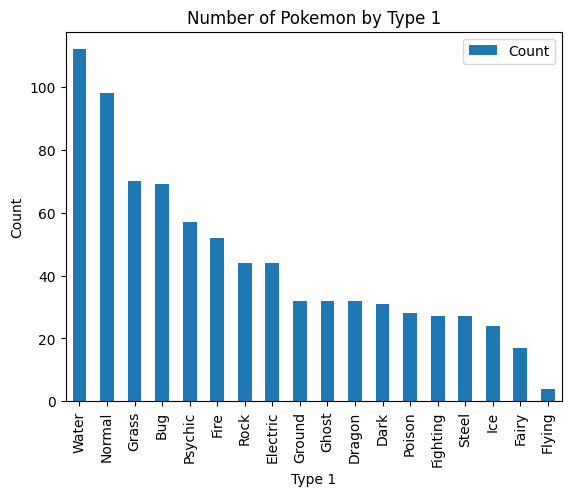

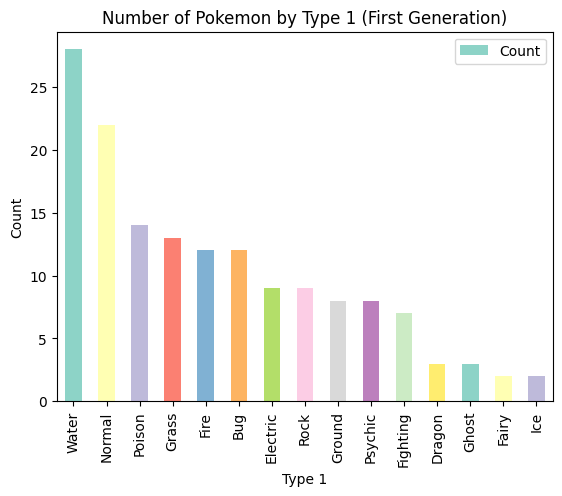

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokedex = pd.read_csv('pokemon_data.csv')

poke_type = pokedex['Type 1'].value_counts()

poke_dataframe = pd.DataFrame({'Type 1': poke_type.index, 'Count': poke_type.values})
poke_dataframe.plot.bar(x='Type 1', y='Count')
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.title('Number of Pokemon by Type 1')
plt.show()


pokedex = pd.read_csv('filtered_pokemon_data.csv')
subset_pokedex = pokedex.iloc[0:152]

poke_type = subset_pokedex['Type 1'].value_counts()

poke_dataframe = pd.DataFrame({'Type 1': poke_type.index, 'Count': poke_type.values})

color_palette = sns.color_palette('Set3', len(poke_dataframe))

poke_dataframe.plot.bar(x='Type 1', y='Count', color = color_palette)
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.title('Number of Pokemon by Type 1 (First Generation)')
plt.show()

# Gráfico TOP 10 Lendarios mais fortes (Status Totais)

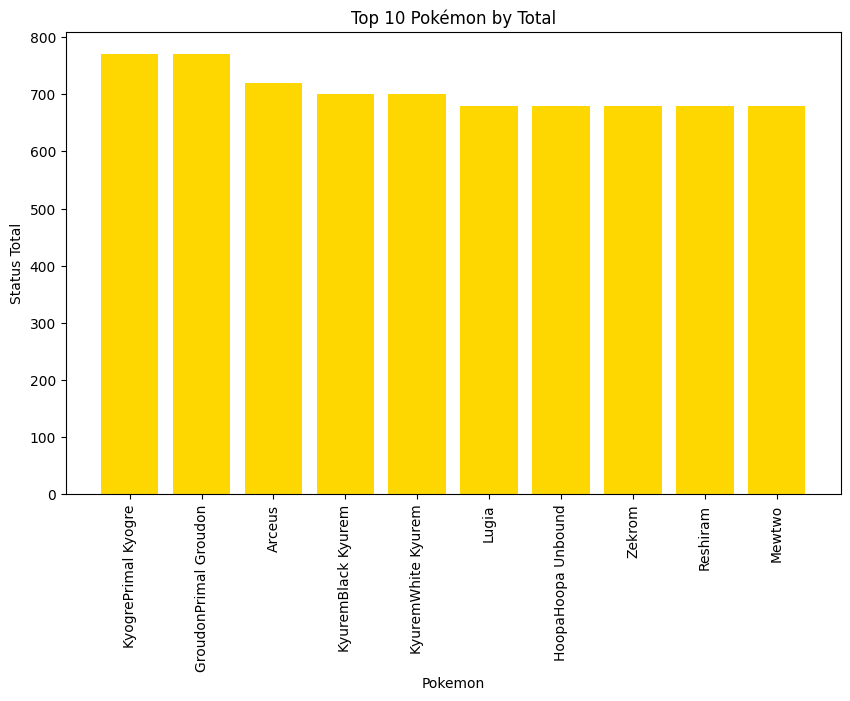

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('filtered_pokemon_data.csv')

# Sort the DataFrame by 'Total' column in descending order
sorted_pokedex = pokedex.sort_values(by='Total', ascending=False)

# Get the top 10 Pokémon based on 'Total' and 'Legendary'
top_10_pokemon = sorted_pokedex.head(10)

# Create a bar plot of the top 10 Pokémon
plt.figure(figsize=(10, 6))
plt.bar(top_10_pokemon['Name'], top_10_pokemon['Total'], color=top_10_pokemon['Legendary'].map({True: 'gold', False: 'blue'}))
plt.xlabel('Pokemon')
plt.ylabel('Status Total')
plt.title('Top 10 Pokémon by Total')
plt.xticks(rotation=90)
plt.show()

# Mini Game

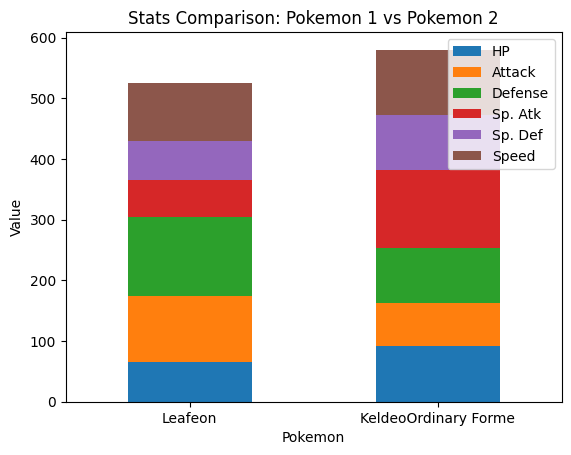

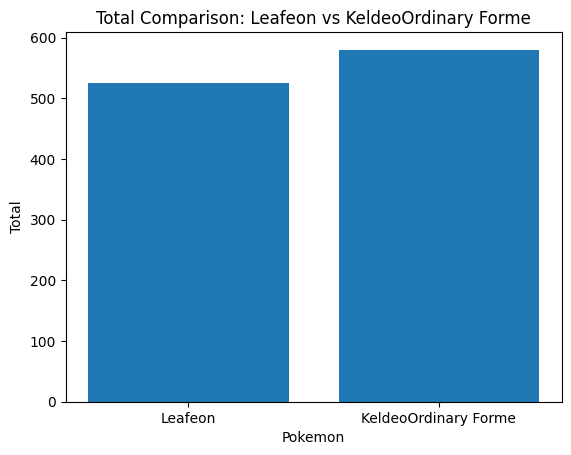

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import random

random_number1 = random.randint(0,749)
random_number2 = random.randint(0,749)

pokedex = pd.read_csv('filtered_pokemon_data.csv')

pokedex_pokemon1 = pokedex.loc[random_number1]
pokedex_pokemon2 = pokedex.loc[random_number2]

stacked_data = pd.DataFrame({pokedex_pokemon1['Name']: pokedex_pokemon1[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']],
                             pokedex_pokemon2['Name']: pokedex_pokemon2[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]},
                            index=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

# Transpose the DataFrame for stacked bar plot
stacked_data = stacked_data.T

# Plot the stacked bar graph
stacked_data.plot(kind='bar', stacked=True)

plt.xlabel('Pokemon')
plt.ylabel('Value')
plt.title('Stats Comparison: Pokemon 1 vs Pokemon 2')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()

total_data = pd.DataFrame({'Pokemon': [pokedex_pokemon1['Name'], pokedex_pokemon2['Name']],
                           'Total': [pokedex_pokemon1['Total'], pokedex_pokemon2['Total']]})

# Plot the bar graph
plt.bar(total_data['Pokemon'], total_data['Total'])

plt.xlabel('Pokemon')
plt.ylabel('Total')
plt.title('Total Comparison: {} vs {}'.format(pokedex_pokemon1['Name'], pokedex_pokemon2['Name']))
plt.show()

# Bubble Chart

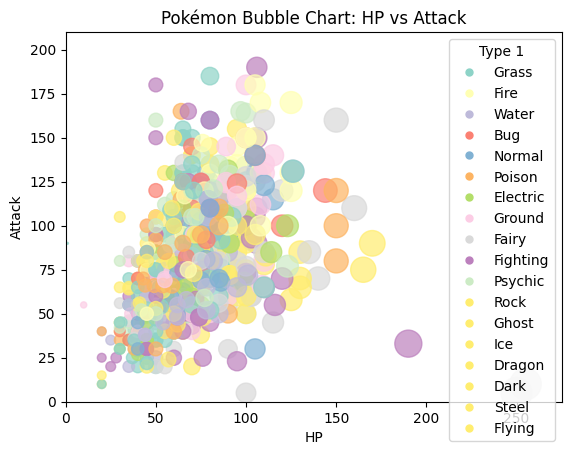

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('pokemon_data.csv')

# Subset the data for required columns
subset_data = pokedex[['HP', 'Type 1', 'Attack']]

# Plot the bubble chart
plt.scatter(subset_data['HP'], subset_data['Attack'], s=subset_data['HP']*2, c=subset_data['Type 1'].astype('category').cat.codes, cmap='Set3', alpha=0.7)

# Set labels and title
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('Pokémon Bubble Chart: HP vs Attack')

# Add legend for Type 1 categories
type1_categories = pokedex['Type 1'].unique()
type1_handles = [plt.Line2D([], [], marker='o', markersize=5, linestyle='', color=plt.cm.Set3(i), label=cat) for i, cat in enumerate(type1_categories)]
plt.legend(handles=type1_handles, title='Type 1')


plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('Pokémon Bubble Chart: HP vs Attack')
plt.xlim(0, subset_data['HP'].max()+20)
plt.ylim(0, subset_data['Attack'].max()+20)

# Display the plot
plt.show()

# Qual tipo de pokemon tem a maior quantidade de vida e ataque?

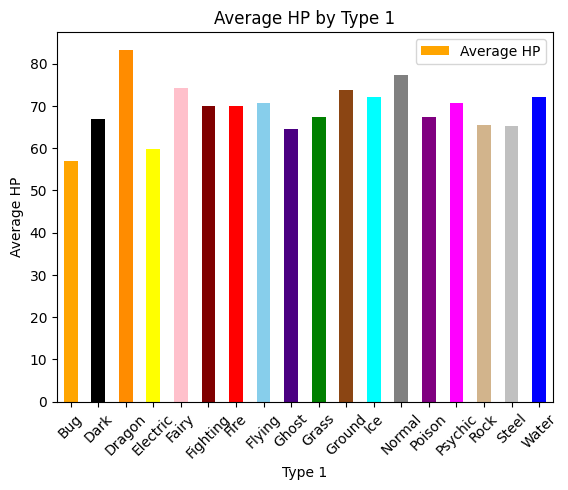

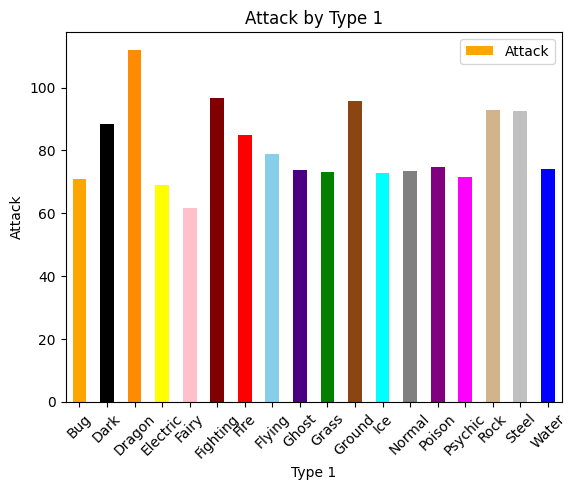

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('pokemon_data.csv')

# Calculate the average 'HP' for each 'Type 1' of Pokemon
avg_hp_by_type1 = pokedex.groupby('Type 1')['HP'].mean()

# Create a DataFrame with the average 'HP' values
avg_hp_df = pd.DataFrame({'Type 1': avg_hp_by_type1.index, 'Average HP': avg_hp_by_type1.values})

color_map = {
    'Grass': 'green',
    'Fire': 'red',
    'Water': 'blue',
    'Bug': 'orange',
    'Normal': 'gray',
    'Poison': 'purple',
    'Electric': 'yellow',
    'Ground': 'saddlebrown',
    'Fairy': 'pink',
    'Fighting': 'maroon',
    'Psychic': 'magenta',
    'Rock': 'tan',
    'Ghost': 'indigo',
    'Ice': 'aqua',
    'Dragon': 'darkorange',
    'Steel': 'silver',
    'Flying': 'skyblue',
    'Dark': 'black',
}

# Plot the bar graph
avg_hp_df.plot(kind='bar', x='Type 1', y='Average HP', color=avg_hp_df['Type 1'].map(color_map) )

plt.xlabel('Type 1')
plt.ylabel('Average HP')
plt.title('Average HP by Type 1')
plt.xticks(rotation=45)
plt.show()

# Calculate the average 'HP' for each 'Type 1' of Pokemon
avg_atk_by_type1 = pokedex.groupby('Type 1')['Attack'].mean()

# Create a DataFrame with the average 'HP' values
avg_atk_df = pd.DataFrame({'Type 1': avg_atk_by_type1.index, 'Attack': avg_atk_by_type1.values})

avg_atk_df.plot(kind='bar', x='Type 1', y='Attack', color=avg_atk_df['Type 1'].map(color_map) )

plt.xlabel('Type 1')
plt.ylabel('Attack')
plt.title('Attack by Type 1')
plt.xticks(rotation=45)
plt.show()

# Top 5 Pokemons mais resistentes.

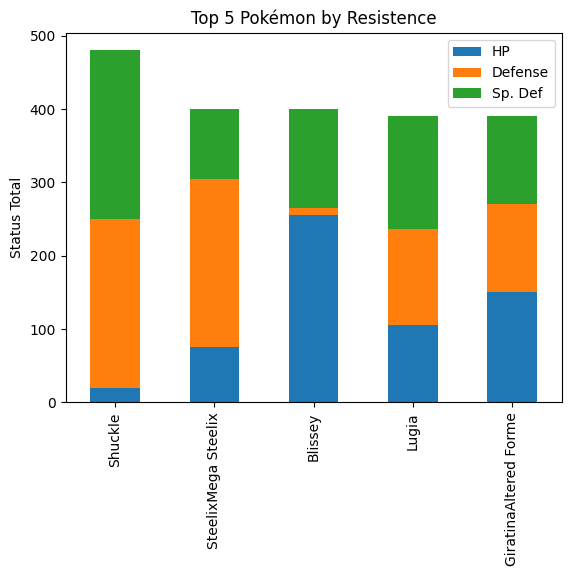

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('pokemon_data.csv')

# Calculate the total of 'HP', 'Defense', and 'Sp. Def' for each Pokémon
pokedex['Total'] = pokedex['HP'] + pokedex['Defense'] + pokedex['Sp. Def']

sorted_pokedex = pokedex.sort_values(by='Total', ascending=False)

# Get the top 10 Pokémon based on 'Total' and 'Legendary'
top_5_pokemon = sorted_pokedex.head(5)

# Create a stacked bar plot of the top 5 Pokémon
top_5_pokemon[['HP', 'Defense', 'Sp. Def']].plot(kind='bar', stacked=True)

pokemon_names = top_5_pokemon['Name'].tolist()

plt.xlabel('')
plt.ylabel('Status Total')
plt.title('Top 5 Pokémon by Resistence')
plt.xticks(range(len(pokemon_names)), pokemon_names, rotation=90)
plt.show()

# TOP 5 Pokemons com maior DPS (Damage-per-Second)

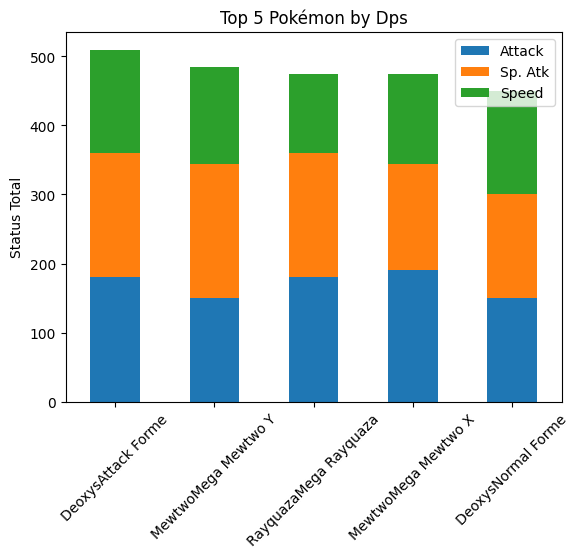

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('pokemon_data.csv')

# Calculate the total of 'HP', 'Defense', and 'Sp. Def' for each Pokémon
pokedex['Total'] = pokedex['Attack'] + pokedex['Sp. Atk'] + pokedex['Speed']

sorted_pokedex = pokedex.sort_values(by='Total', ascending=False)

# Get the top 10 Pokémon based on 'Total' and 'Legendary'
top_5_pokemon = sorted_pokedex.head(5)

# Create a stacked bar plot of the top 5 Pokémon
top_5_pokemon[['Attack', 'Sp. Atk', 'Speed']].plot(kind='bar', stacked=True)

pokemon_names = top_5_pokemon['Name'].tolist()

plt.xlabel('')
plt.ylabel('Status Total')
plt.title('Top 5 Pokémon by Dps')
plt.xticks(range(len(pokemon_names)), pokemon_names, rotation=45)
plt.show()

# Gráfico Scatter por gerações e os atributos de ataque e defesa

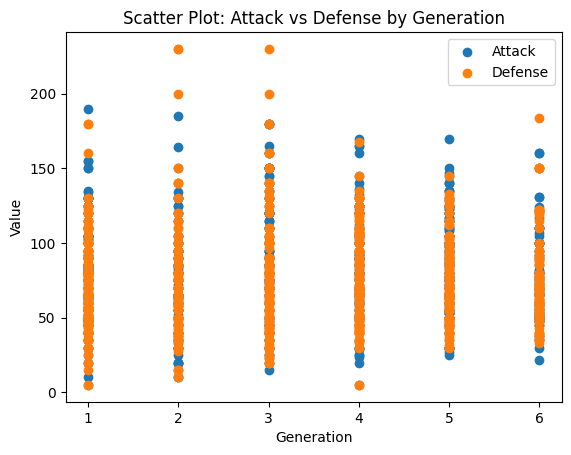

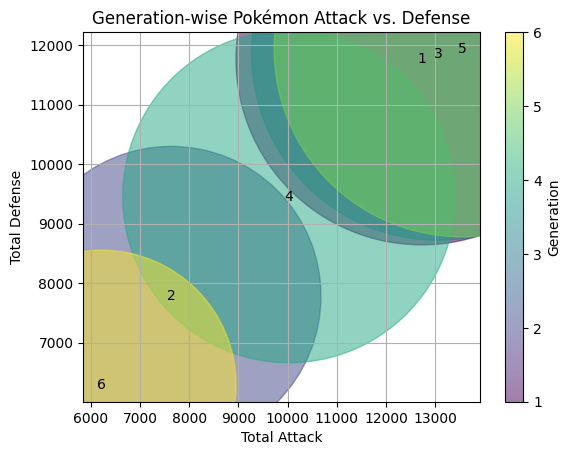

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

pokedex = pd.read_csv('pokemon_data.csv')

plt.scatter(pokedex['Generation'], pokedex['Attack'], label='Attack')
plt.scatter(pokedex['Generation'], pokedex['Defense'], label='Defense')

plt.xlabel('Generation')
plt.ylabel('Value')
plt.title('Scatter Plot: Attack vs Defense by Generation')
plt.legend()
plt.show()

#-----------------------------------------------------------------------------------------

generation_stats = pokedex.groupby('Generation')[['Attack', 'Defense']].sum().reset_index()

plt.scatter(x=generation_stats['Attack'], y=generation_stats['Defense'],
            s=generation_stats['Attack'] + generation_stats['Defense'] * 5,
            alpha=0.5, c=generation_stats['Generation'], cmap='viridis')

# Add labels to the bubbles
for i, row in generation_stats.iterrows():
    plt.text(row['Attack'], row['Defense'], str(row['Generation']), ha='center', va='center')


plt.xlabel('Total Attack')
plt.ylabel('Total Defense')
plt.title('Generation Pokémon Attack vs. Defense')
plt.colorbar(label='Generation')
plt.grid(True)
plt.show()

# Comparação do Status total entre gerações:

![image](https://preview.redd.it/441batd7gzuy.png?auto=webp&v=enabled&s=058fe6d8dced4eaf31db94f58ee92e914c910664)

/tmp/ipykernel_312/4285739011.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Set3')


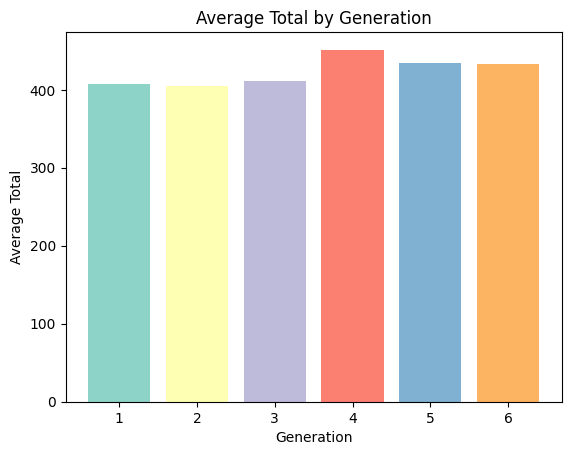

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
pokedex = pd.read_csv('filtered_pokemon_data.csv')

# Calculate the average 'Total' for each Generation
generation_avg = pokedex.groupby('Generation')['Total'].mean().reset_index()

color_map = plt.cm.get_cmap('Set3')

# Create the bar plot
plt.bar(generation_avg['Generation'], generation_avg['Total'], color= color_map(np.arange(len(generation_avg))))

# Set labels and title
plt.xlabel('Generation')
plt.ylabel('Average Total')
plt.title('Average Total by Generation')

# Show the plot
plt.show()
